In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

np.random.seed(0)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [4]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

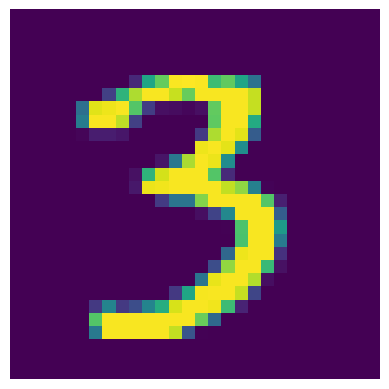

In [7]:
plt.imshow(X_train[10000])
plt.axis('off')
plt.show()

In [10]:
for i in range(0,10):
  print(i,':',len(X_train[y_train==i]))

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


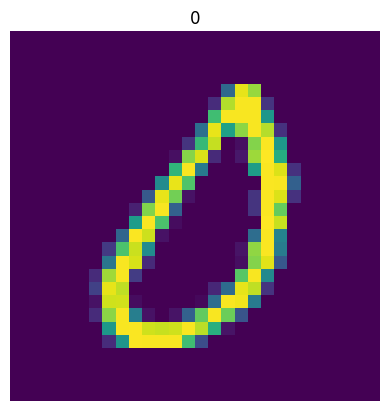

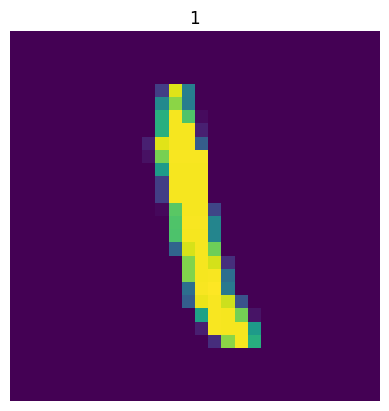

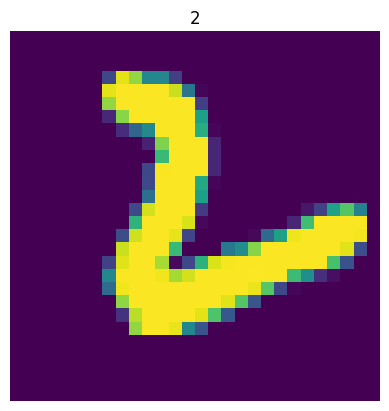

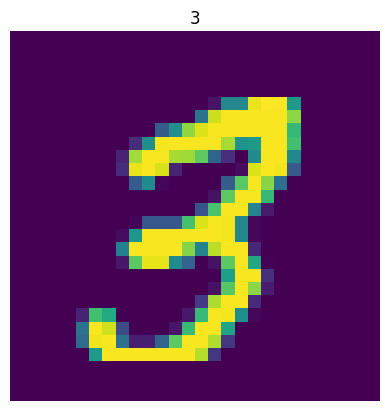

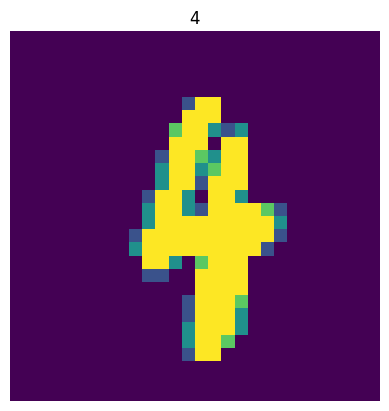

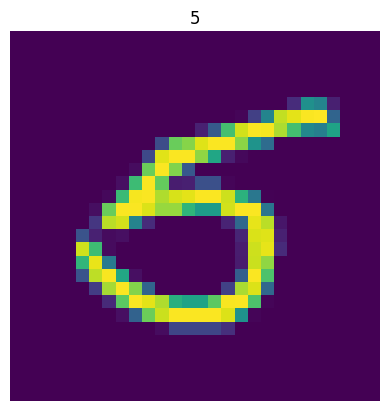

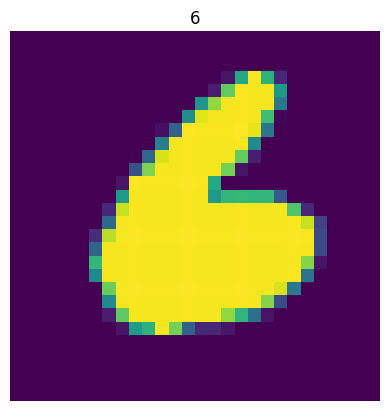

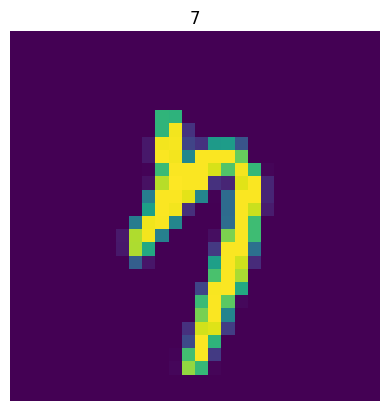

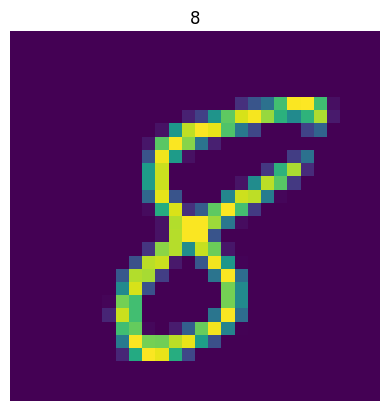

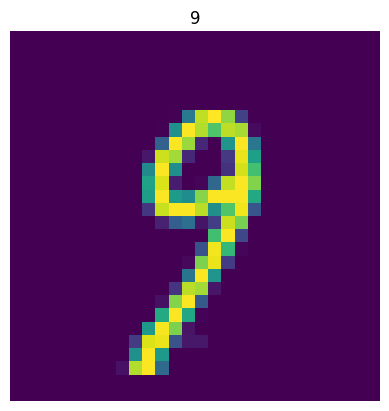

In [11]:
for i in range(0,10):
  plt.imshow(X_train[y_train==i][np.random.randint(0,5000)])
  plt.title(str(i))
  plt.axis('off')
  plt.show()

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
X_train = X_train/255 
X_test = X_test/255

In [16]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape

(60000, 784)

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels,
                    activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), 
                  loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model

In [21]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
history = model.fit(X_train, y_train, validation_split=0.1,
                    epochs = 10, batch_size = 200, verbose = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5492 - accuracy: 0.8347 - val_loss: 0.2384 - val_accuracy: 0.9328
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2797 - accuracy: 0.9180 - val_loss: 0.2158 - val_accuracy: 0.9353
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2550 - accuracy: 0.9246 - val_loss: 0.2087 - val_accuracy: 0.9403
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2374 - accuracy: 0.9304 - val_loss: 0.2054 - val_accuracy: 0.9395
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9328 - val_loss: 0.1852 - val_accuracy: 0.9452
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9351 - val_loss: 0.2253 - val_accuracy: 0.9338
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2112 - accuracy: 0.9367 - val_loss: 0.2042 - val_accuracy: 0.9398
Epoch 

Text(0.5, 0, 'epoch')

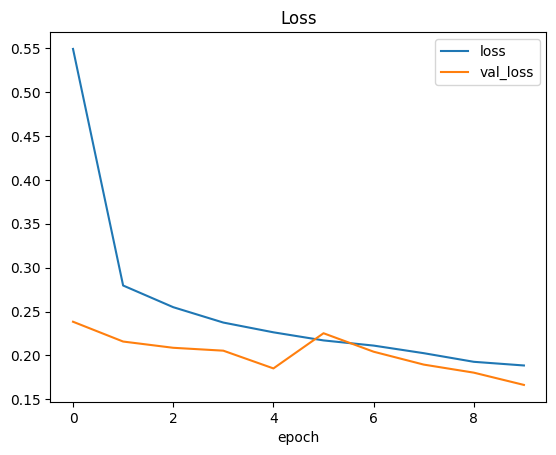

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

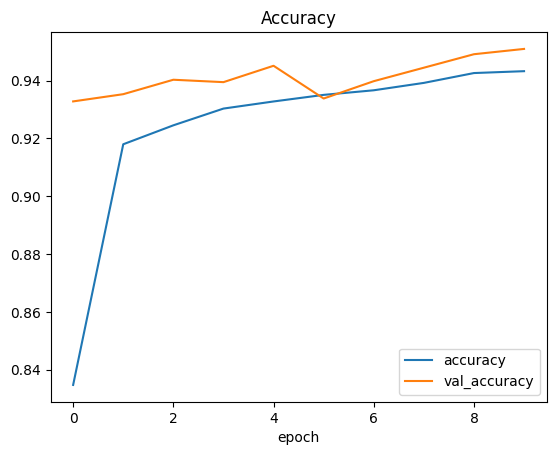

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [25]:
from google.colab import files
upload = files.upload()

In [ ]:
d = list(upload.keys())[0]
print(d)

In [ ]:
import cv2
a = np.fromstring(upload[d],np.uint8)
b = cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(b,cmap=plt.get_cmap("gray"))

In [ ]:
b = cv2.resize(b,(28,28))
b = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)
b = cv2.bitwise_not(b)
plt.imshow(b,cmap=plt.get_cmap("gray"))

In [ ]:
b = b/255
b = b.reshape(1,784)
prediction = model.predict(b)

In [ ]:
p = np.argmax(prediction,axis=1)

In [ ]:
p

In [ ]:
print(str(p))